<a href="https://colab.research.google.com/github/AnnmariyaFrancis/ideal-eureka/blob/main/spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dataset and necessary libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk import TweetTokenizer
tk=TweetTokenizer()
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Luminar_projects/spam.csv')

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
#drop unnecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
#rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

<Axes: xlabel='target', ylabel='count'>

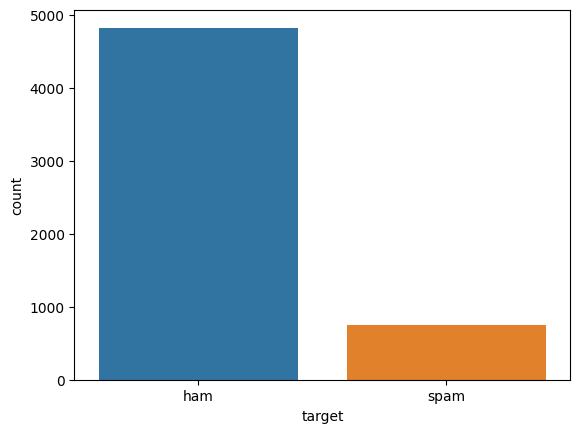

In [ ]:

sns.countplot(x='target',data=df)

In [ ]:
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check for duplicate values
df.duplicated().sum()

403

In [ ]:
#remove duplicates
df.drop_duplicates()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
#Data is imbalanced

In [ ]:
tk=TweetTokenizer()
ss=SnowballStemmer('english')

In [ ]:
def preprocess(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  text=[word.translate(str.maketrans('', '', string.punctuation)) for word in text]
  y=[]
  for i in text:
    if i.isalnum() and  i not in stopwords.words('english'):
      y.append(ss.stem(i))
  processed_text=" ".join(y)
  return processed_text

In [ ]:
df['transformed_text']=df['text'].apply(preprocess)

In [ ]:
preprocess(' I loved the YT lectures on Machine learning .How about you?')

'love yt lectur machin learn'

In [ ]:
#no of characters
df["num_characters"]=df['text'].apply(len) #shows number of characters
df.head()

,target,text,transformed_text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkts 2...,155
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though,61


EDA

In [ ]:
df['num_characters'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: num_characters, dtype: float64

In [ ]:
#ham
df[df['target']==0]['num_characters'].describe()


count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: num_characters, dtype: float64

In [ ]:
#spam
df[df['target']==1]['num_characters'].describe()

count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: num_characters, dtype: float64

<Axes: xlabel='num_characters', ylabel='Count'>

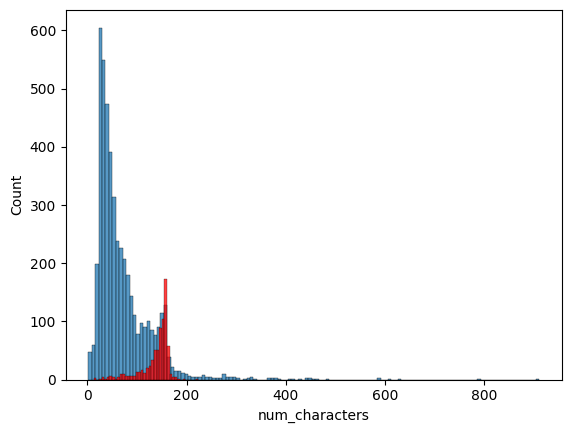

In [ ]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

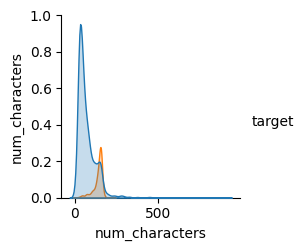

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-28-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

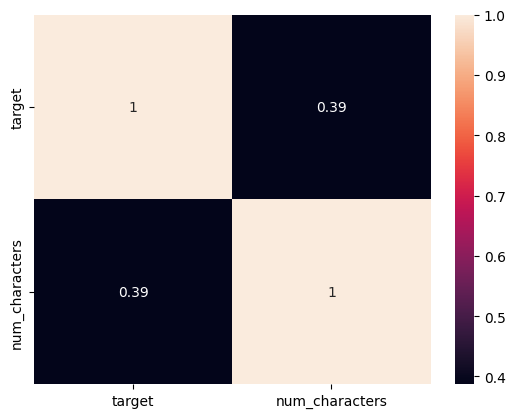

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.head()

,target,text,transformed_text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,111
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkts 2...,155
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,49
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goe usf live around though,61


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

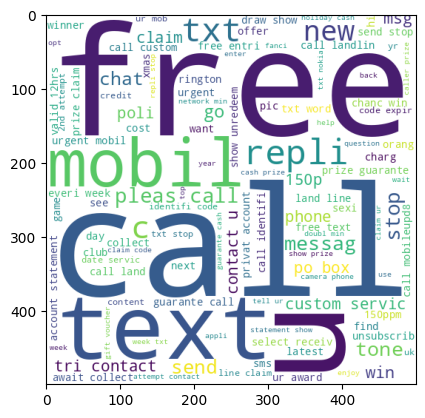

In [ ]:
plt.imshow(wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' ')))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [ ]:
X.shape

(5572, 3000)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [ ]:
lrc = LogisticRegression()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [ ]:
#LogisticRegression
lrc.fit(X_train,y_train)
y_pred_lr=lrc.predict(X_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       976
           1       0.96      0.82      0.88       139

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
#GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       976
           1       0.47      0.91      0.62       139

    accuracy                           0.86      1115
   macro avg       0.73      0.88      0.77      1115
weighted avg       0.92      0.86      0.88      1115



In [ ]:
#MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.99      0.86      0.92       139

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
#BernoulliNB
bnb.fit(X_train,y_train)
y_pred3= mnb.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.99      0.86      0.92       139

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
#AdaBoostClassifier
abc.fit(X_train,y_train)
y_pred_abc=abc.predict(X_test)
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       976
           1       0.92      0.87      0.89       139

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       0.98      0.88      0.92       139

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



over_sampling

In [ ]:
from imblearn.over_sampling import ADASYN

# Assuming X contains the features and y contains the target variable

# Instantiate SMOTE
smote = ADASYN ()

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=1)

In [ ]:
#LogisticRegression
lrc_os=LogisticRegression()
lrc_os.fit(X_train,y_train)
y_pred_lr_os=lrc_os.predict(X_test)
print(classification_report(y_test,y_pred_lr_os))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       947
           1       0.98      0.94      0.96       981

    accuracy                           0.96      1928
   macro avg       0.96      0.96      0.96      1928
weighted avg       0.96      0.96      0.96      1928



In [ ]:
gnb_os=GaussianNB()
gnb_os.fit(X_train,y_train)
y_pred_os = gnb_os.predict(X_test)
print(classification_report(y_test,y_pred_os))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       947
           1       0.87      1.00      0.93       981

    accuracy                           0.93      1928
   macro avg       0.94      0.92      0.93      1928
weighted avg       0.94      0.93      0.93      1928



In [ ]:
#MultinomialNB
mnb_os=MultinomialNB()
mnb_os.fit(X_train,y_train)
y_pred2_os= mnb_os.predict(X_test)
print(classification_report(y_test,y_pred2_os))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       947
           1       0.97      0.98      0.97       981

    accuracy                           0.97      1928
   macro avg       0.97      0.97      0.97      1928
weighted avg       0.97      0.97      0.97      1928



In [ ]:
#BernoulliNB
bnb_os=BernoulliNB()
bnb_os.fit(X_train,y_train)
y_pred3_os= bnb_os.predict(X_test)
print(classification_report(y_test,y_pred3_os))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       947
           1       1.00      0.97      0.98       981

    accuracy                           0.98      1928
   macro avg       0.98      0.98      0.98      1928
weighted avg       0.98      0.98      0.98      1928



In [ ]:
#AdaBoostClassifier
abc_os= AdaBoostClassifier(n_estimators=50, random_state=2)
abc_os.fit(X_train,y_train)
y_pred_abc_os=abc_os.predict(X_test)
print(classification_report(y_test,y_pred_abc_os))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       947
           1       0.98      0.95      0.96       981

    accuracy                           0.96      1928
   macro avg       0.96      0.96      0.96      1928
weighted avg       0.96      0.96      0.96      1928



In [ ]:
#Random Forest Classifier
rfc_os = RandomForestClassifier(n_estimators=50, random_state=2)
rfc_os.fit(X_train,y_train)
y_pred_rfc_os=rfc_os.predict(X_test)
print(classification_report(y_test,y_pred_rfc_os))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       947
           1       1.00      0.99      1.00       981

    accuracy                           1.00      1928
   macro avg       1.00      1.00      1.00      1928
weighted avg       1.00      1.00      1.00      1928



In [ ]:
#Apply Stacking
estimators=[('BernauliNB',bnb_os), ('MultinomialNB',mnb_os),('Logistic Regression',lrc_os)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

Classification report               precision    recall  f1-score   support

           0       0.99      1.00      0.99       947
           1       1.00      0.99      0.99       981

    accuracy                           0.99      1928
   macro avg       0.99      0.99      0.99      1928
weighted avg       0.99      0.99      0.99      1928

Confusion atrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f3e7ec27ee0>


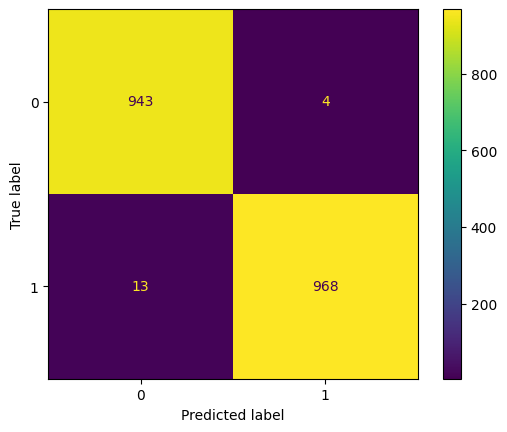

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Classification report",classification_report(y_test,y_pred))
print("Confusion atrix",ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pickle','wb'))
pickle.dump(bnb_os ,open('model.pickle','wb'))